## From Tweets to Tasks: An Agile NLP Framework for Real-Time Customer Insights

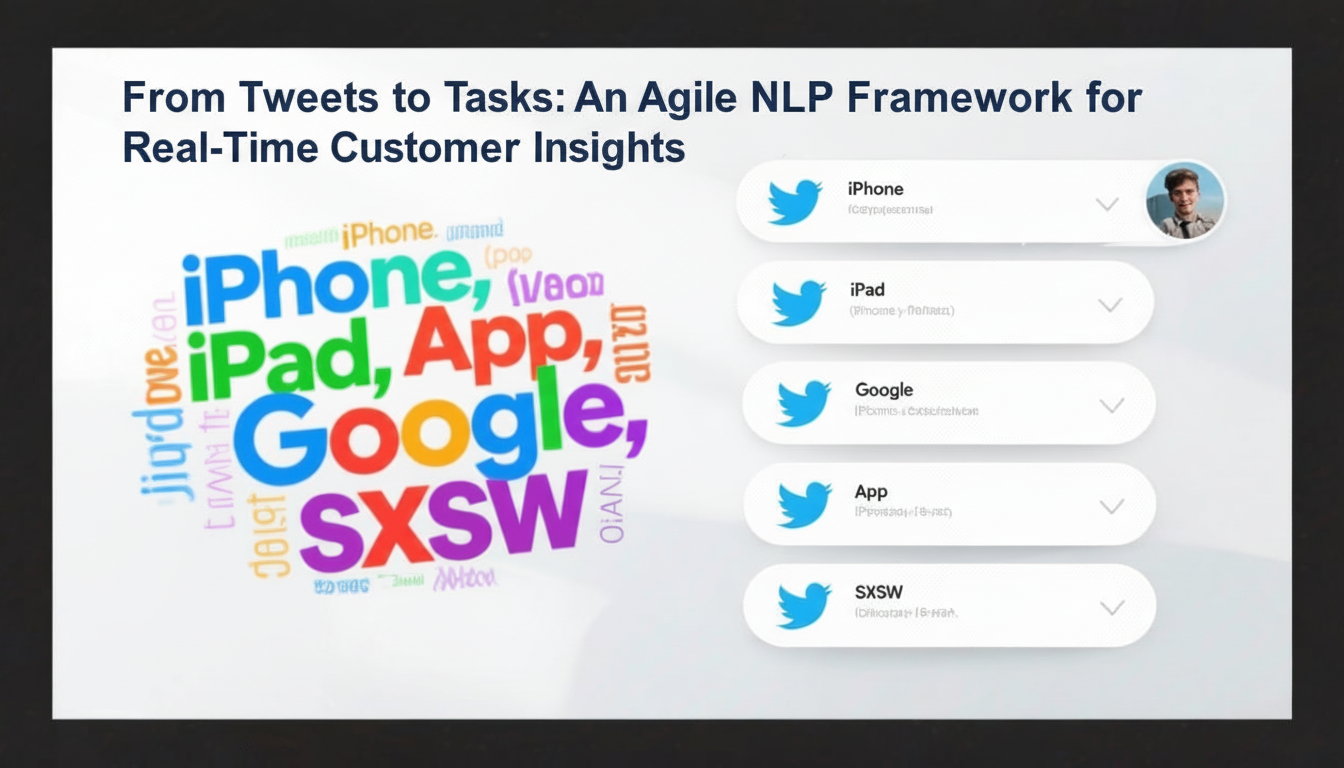

## Problem, Vision & Setup

### Problem Statement
During high-profile events like product launches or festivals (e.g., SXSW), brands are overwhelmed with thousands of social media posts.  
These tweets are short, noisy, and inconsistent, often filled with hashtags, mentions, emojis, or sarcasm.  

This creates several challenges:  
- Negative feedback may be missed until it escalates into a crisis.  
- Positive buzz may fade before it can be amplified.  
- Manual analysis is time-consuming, inconsistent, and biased.  

- This leads to a critical delay between what customers are saying in real time and how quickly product teams can act.


### Vision
To build an Agile-driven NLP solution that transforms unstructured tweets into clear, actionable sentiment insights, delivered in short sprints.  
This ensures product teams can:  
- Detect customer pain points faster.  
- Amplify positive engagement at the right time.  
- Continuously improve products and communication strategies.  


### Value Proposition
This project delivers value at multiple levels:  
- Product Teams: Cut turnaround time for insights from days to under 24 hours.  
- Decision-Makers: Access brand-level dashboards that highlight opportunities and risks.  
- Academia (Class Project): Demonstrates how Agile + NLP can solve real-world problems while building student expertise.  
- Scalability: Provides a reusable framework for analyzing other text sources (reviews, surveys, live social streams).  

### Objectives (Data Understanding & Preparation)

The focus of Sprint 1 is to understand and prepare the dataset before modeling.  

- Audit dataset structure (rows, columns, missing values, duplicates).  
- Explore sentiment label distribution (Positive, Negative, No Emotion).  
- Identify brand/product mentions and their frequency.  
- Analyze basic tweet characteristics (length, hashtags, mentions, URLs).  
- Draft a Data Card to document dataset quality, assumptions, and limitations.  
- Define baseline success metric (≥70% accuracy for the first classifier).  


### Approach (Sprint 1 Plan)
1. Data Audit → Inspect dataset size, nulls, and duplicates.  
2. Label Review → Check sentiment distribution and class imbalance.  
3. Target Review → Identify brand/product categories; flag ambiguous cases.  
4. Content Diagnostics → Evaluate text signals (hashtags, mentions, URLs, retweets).  
5. Documentation → Draft a Data Card summarizing dataset quality and risks.  
6. Agile Output → Deliverable = “A cleaned dataset + documented understanding of its structure and assumptions.” 



### Sprint 1 Backlog (Agile Demo)
| Task                          | Owner   | Status   |
|-------------------------------|---------|----------|
| Load and inspect dataset      | Elvis   | Done     |
| Handle duplicates & nulls     | Elvis   | Done     |
| Analyze labels distribution   | Esterina| Pending  |
| Review target categories      | Anne    | Pending  |
| Draft Data Card (quality doc) | Anne    | Pending  |



### Stakeholders
- Student Team : Gain practical experience applying Agile + NLP.  
- Instructor / Supervisor: Evaluate methodology, clarity, and delivery at each sprint.  
- Classmates (Peer Audience): Act as *end users*, validating whether outputs are understandable.  
- Industry Stakeholder (Hypothetical Product Manager): Would use insights to prioritize fixes, improve customer experience, and amplify positive trends.  



### Evaluation Plan
To measure success across sprints:  
- Accuracy / Macro-F1: ≥70% baseline performance for sentiment classification.  
- Coverage: At least 90% of tweets should map to a valid brand/product category.  
- Turnaround Time: Insights generated within <24 hours per batch.  
- Actionability: ≥3 insights per sprint must translate into backlog tasks.  



### Learning Outcomes (for Students)
By the end of this project, I will:  
- Apply Agile methods to a data science workflow.  
- Develop an NLP pipeline from cleaning → modeling → visualization.  
- Practice stakeholder communication by converting raw data into clear insights.  
- Understand and document ethical considerations (bias, PII, representativeness).  



### Ethical Considerations
- Data Privacy: Only public tweets used; no private information.  
- Bias Awareness: Tweets may over-represent tech-savvy or event-specific users.  
- Sarcasm/Irony: Sentiment labels may fail to capture nuance.  
- Transparency: Use of Data Cards to document dataset risks and limitations. 

#### The Approach

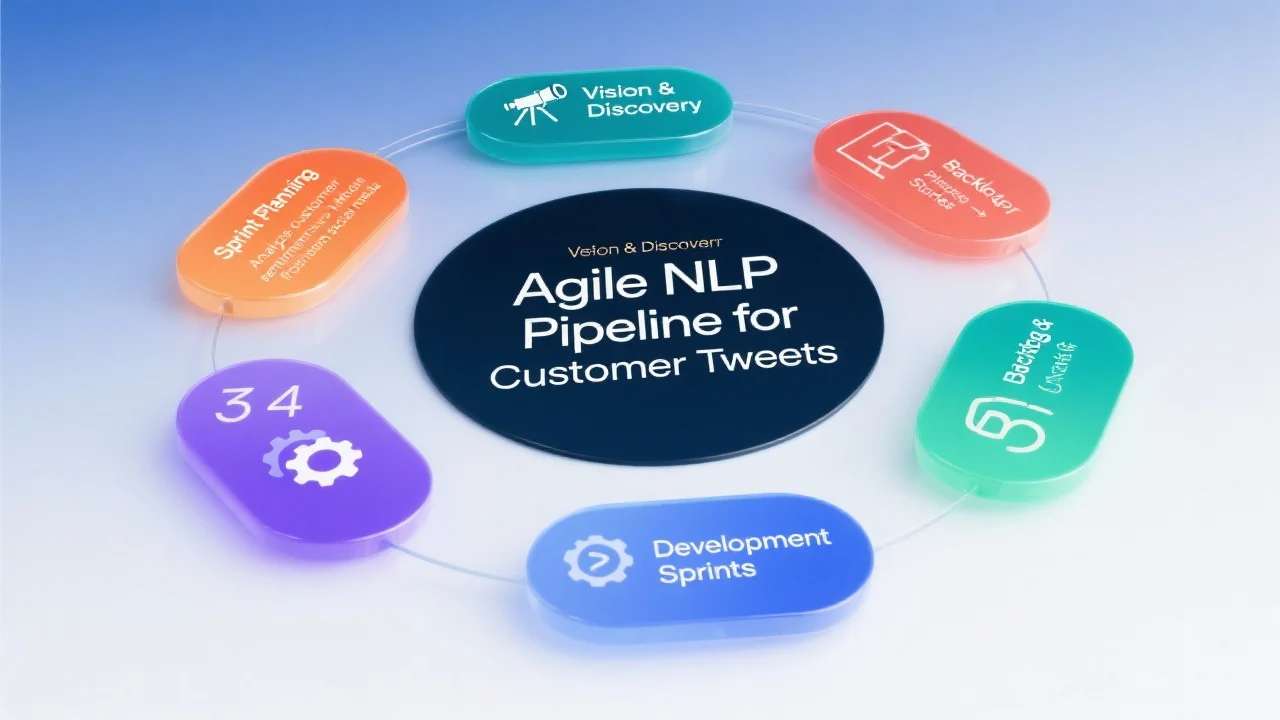